<a href="https://colab.research.google.com/github/pietrodileo/Python_for_MD_thesis/blob/main/AudioSignalsPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔊 **Audio Signal Preprocessing** 
## Preprocess audio signals stored in Google Drive

# 📚 Import libraries 

In [ ]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib
#This backend of matplotlib doesn't show plots to the user, but we can save them to Google Drive
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pdb
import librosa
import librosa.display
from scipy.io import wavfile
import seaborn as sns
from pathlib import Path
import pylab
import sys
import soundfile as sf
import tensorflow as tf
import IPython.display as ipd
#!pip install audiomentations
#!pip install noisereduce
from scipy.io import wavfile
#import noisereduce as nr
from librosa.util import fix_length
from scipy import signal
#let the plot appear and store it with the notebook
%matplotlib inline

In [ ]:
def outputPath(subfolder,filename,OUTPUT_DIR,destination):
  file_path = os.path.join(subfolder, filename)
  file_stem = Path(subfolder).stem
  target_dir = f'class_{file_stem}'
  destination_dir = os.path.join(os.path.join(OUTPUT_DIR, destination), target_dir)
  # generate image name
  file_stem = Path(file_path).stem
  imageName = os.path.join(destination_dir, file_stem)
  return file_path, destination_dir,imageName;

# Filtering

In [ ]:
def LowPassFilt(data, sample_rate):
 cutFreq = 16000. # in Hz
 fs = sample_rate
 filterOrder = 6
 nyqFreq = fs / 2.
 normalCutoff = cutFreq / nyqFreq
 b, a = signal.butter(filterOrder, normalCutoff, 'low', analog=False)
 filtered = signal.filtfilt(b, a, data)
 return filtered 

In [ ]:
# cutFreq = 16000. # in Hz
# fs = 44100 
# filterOrder = 6
# nyqFreq = fs / 2.
# normalCutoff = cutFreq / nyqFreq
# b, a = signal.butter(filterOrder, normalCutoff, 'low', analog=False)
# w, h = signal.freqz(b, a, fs=sample_rate)
# plt.plot(w,  np.abs(h))
# plt.title('Butterworth filter frequency response')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Magnitude (abs)')
# plt.xlim(0, 0.5*sample_rate)
# plt.grid(which='both', axis='both')
# plt.plot(cutFreq, 0.5*np.sqrt(2), 'ko')
# plt.axvline(cutFreq, color='k') # cutoff frequency
# plt.show()

# 🏗 Data Normalization 

In [ ]:
# Data normalization function
# from audiomentations import Normalize, Compose
# # data normalization
# DataNormalization = Compose([Normalize(p=1.0)])  

# ⛹ Define Input and Output directory 

In [ ]:
fileName = 'DatasetTesiFinale_vowelE_FineCut_Short_LowCut12kHz'
zipfile = fileName + '.zip'
directory = '/content/drive/MyDrive/DatasetTesi/'

zipPath = os.path.join(directory,zipfile)
outputPath = os.path.join(directory,'Risultati')

if not os.path.exists(outputPath):
   # Create a new directory because it does not exist
   os.makedirs(outputPath)
   print("The output folder has been created!")

# Location of Zip File
drive_path = zipPath
local_path = '/content'

zipCopyPath = os.path.join(local_path,zipfile)
if not os.path.exists(zipCopyPath):
  # Copy the zip file and move it up one level (AKA out of the drive folder)
  !cp '{drive_path}' .
else:
  print('Files already transferred from Drive')

if not os.path.exists(fileName):
  # Navigate to the copied file and unzip it quietly
  os.chdir(local_path)
  !unzip -q '{zipfile}'
else:
  print('Files already unzipped')
# change directory to the new one
NewDir = os.path.join(local_path,fileName)
valid_formats = [".wav"]

In [ ]:
# Delete a folder
# !rm -rf '{NewDir}'

# Clear all variables
#%reset

Creo una cartella dove salvare l'output

In [ ]:
# For every recording, make a spectogram and save it as label_speaker_no.png
# if not os.path.exists(os.path.join(OUTPUT_DIR, 'preprocessed')):
#     os.makedirs(os.path.join(OUTPUT_DIR, 'preprocessed'))

# 📽 Preprocessing
1.   Resample all audio files to 44100 Hz 
2.   Convert all audio files in mono
3.   Data normalization
4.   Noise Reduction (eventually do it manually, if needed)
5.   Remove unvoiced parts of the signal (manually)
6.   Standardize Length 
7.   PreEmphasis or Low Pass
8.   Save pre-processed audio file


In [ ]:
time_array = []
name_array = []
label_array = []
for folders in os.listdir(NewDir):
  # select a subfolder
  subfolder = os.path.join(NewDir,folders)
  # select all the records in the subfolder
  for filename in os.listdir(subfolder):
    file_format = os.path.splitext(filename)[1] 
    if file_format.lower() in valid_formats:
      #print('Now reading', filename)
      name_array.append(filename)
      # define output path
      #file_path, destination_dir, imageName = outputPath(subfolder,filename,outputPath,'preprocessed')
      # create destination folder if it doesn't exist
      #if not os.path.exists(destination_dir):
      #  os.mkdir(destination_dir)
      
      # 1. & 2. Resample data to fs = 44100 Hz and convert it to mono
      # sr = 44100 convert all the audio  file to a sample frequency of 44100
      # sr = None leave the fs untouched
      data, sample_rate = librosa.load(os.path.join(subfolder,filename),sr=44100,mono=True)
      
      # labels
      label_array.append(folders)
      # calculate signal length
      sigLenght = len(data)
      Time = sigLenght/sample_rate
      time_array.append(Time)

      # 3. Normalize data
      #data = DataNormalization(data,sample_rate)      

      # 5. Remove unvoiced parts

      # 6. Standardize lenght
      # duration in seconds => required_audio_size
      #required_audio_size = 2 # audio of size 2 second needs to be padded to 5 seconds
      #padded_audio = fix_length(data, size=required_audio_size*sample_rate) # array size is required_audio_size*sampling frequency

      # 7. Preemphasis and Lowcut 
      # PreEmphasis
      # data = librosa.effects.preemphasis(data)

      # LowCut
      #data = LowPassFilt(data, sample_rate)
      
      # 8. Export preprocessed signals

In [ ]:
# import IPython.display as ipd
# ipd.Audio(data, rate=sample_rate) # load a NumPy array

In [ ]:
# ipd.Audio(padded_audio, rate=sample_rate) # load a NumPy array

In [ ]:
# Histogram of time duration

# #specify bin start and end points
# bin_ranges = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

# #create histogram with 4 bins
# plt.hist(time_array, bins=bin_ranges, edgecolor='black')

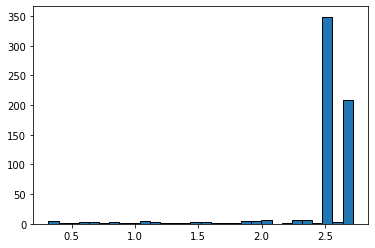

In [ ]:
plt.hist(time_array, bins=30,edgecolor='black');

In [ ]:
np.mean(time_array)

2.450703161432024

In [ ]:
np.std(time_array)

0.4360370317754099

In [ ]:
def search(original_list, element):
  for i, value in enumerate(original_list):
      if original_list[i] == element:
        return i
  return False

def sort_list(list1, list2):
 
    zipped_pairs = zip(list2, list1)
 
    z = [x for _, x in sorted(zipped_pairs)]
 
    return z

In [ ]:
import pandas as pd 
# define a list of 
sortedTimeArray = sorted(time_array, reverse=True)
sorted_order = []
name_sorted = []
label_sorted = []


In [ ]:
for i in range(0,len(sortedTimeArray)):
  # search the index of the subjects with a greater time lenght
  idx = search(time_array, sortedTimeArray[i])
  # Save the indexes of the longest recordings in a list 
  sorted_order.append(idx)
  # sort the name list in order of lenght 
  name_sorted.append(name_array[idx])
  label_sorted.append(label_array[idx])

list2df = list(zip(name_sorted, sortedTimeArray, sorted_order, label_sorted))
df = pd.DataFrame(list2df, columns = ['Names','Duration(s)', 'IDX','Class'])
df.head(100)

,Names,Duration(s),IDX,Class
0,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on
1,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on
2,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on
3,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on
4,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on
...,...,...,...,...
95,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on
96,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on
97,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on
98,PD_ON_TesiPDL_VowelE_0005_FineCut_Short_LowCut...,2.721111,5,advanced_PD-on


In [ ]:
df.tail(100)

,Names,Duration(s),IDX,Class
537,PD_ON_TesiPDL_VowelE_0028_FineCut_Short_LowCut...,2.500023,0,advanced_PD-on
538,PD_ON_TesiPDL_VowelE_0028_FineCut_Short_LowCut...,2.500023,0,advanced_PD-on
539,PD_ON_TesiPDL_VowelE_0028_FineCut_Short_LowCut...,2.500023,0,advanced_PD-on
540,PD_ON_TesiPDL_VowelE_0028_FineCut_Short_LowCut...,2.500023,0,advanced_PD-on
541,PD_ON_TesiPDL_VowelE_0028_FineCut_Short_LowCut...,2.500023,0,advanced_PD-on
...,...,...,...,...
632,PD_DBS_ONON_TesiPDL_VowelE_0031_FineCut_Short_...,0.395850,491,DBS-onon
633,PD_OFF_TesiPDL_VowelE_0004_FineCut_Short_LowCu...,0.376712,620,advanced_PD-OFF
634,PD_Early_TesiPDL_VowelE_0049_FineCut_Short_Low...,0.345170,446,Early_PD
635,HC_TesiPDL_VowelE_0073_FineCut_Short_LowCut12k...,0.340091,334,HealthyControl


In [ ]:
df.groupby(['Class']).mean()

,Duration(s),IDX
Class,,
DBS-onon,1.330814,496.555556
Early_PD,1.454837,425.000000
HealthyControl,1.795712,266.030303
advanced_PD-OFF,1.143045,561.700000
advanced_PD-on,2.571121,2.202128


In [ ]:
df.groupby(['Class']).std()

,Duration(s),IDX
Class,,
DBS-onon,0.627042,14.682101
Early_PD,1.169052,18.248288
HealthyControl,0.653007,94.810826
advanced_PD-OFF,0.660310,31.637004
advanced_PD-on,0.159447,3.902214


In [ ]:
fig, axs = plt.subplots(ncols=2)
df.groupby(['Class'])['Duration(s)'].plot(kind='kde', ax=axs[1],legend=True)
df.groupby(['Class'])['Duration(s)'].hist(alpha=0.4, ax=axs[0])
range=[df['Duration(s)'].min(), df['Duration(s)'].max()]
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
save_plot = 1
# save the plot
if save_plot == 1:
  fig1 = plt.gcf()
  pylab.savefig(outputPath,pad_inches=0)
  plt.cla()
  pylab.close()
  plt.close(fig1)